In [14]:
import pandas as pd

file_path = "C:\\Users\\al6436\\Desktop\\Use Case\\Ecommerce_Consumer_Behavior_Analysis_Data.csv"
df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()

missing_values = df.isnull().sum()

summary_stats = df.describe()

df_info, df_head, missing_values, summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

(None,
    Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
 0  37-611-6911   22  Female       Middle        Married      Bachelor's   
 1  29-392-9296   49    Male         High        Married     High School   
 2  84-649-5117   24  Female       Middle         Single        Master's   
 3  48-980-6078   29  Female       Middle         Single        Master's   
 4  91-170-9072   33  Female       Middle        Widowed     High School   
 
   Occupation  Location     Purchase_Category Purchase_Amount  ...  \
 0     Middle      Évry  Gardening & Outdoors        $333.80   ...   
 1       High  Huocheng      Food & Beverages        $222.22   ...   
 2       High    Huzhen       Office Supplies        $426.22   ...   
 3     Middle    Wiwilí       Home Appliances        $101.31   ...   
 4     Middle      Nara             Furniture        $211.70   ...   
 
    Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
 0                      7             

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\al6436\AppData\Local\Temp\ipykernel_16324\250149142.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\al6436\AppData\Local\Temp\ipykernel_16324\250149142.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engagement_with_Ads'].replace('None', 'No Engagement', inplace=True)


   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category  Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors           333.80  ...   
1       High  Huocheng      Food & Beverages           222.22  ...   
2       High    Huzhen       Office Supplies           426.22  ...   
3     Middle    Wiwilí       Home Appliances           101.31  ...   
4     Middle      Nara             Furniture           211.70  ...   

   Customer_Satisfaction Engagement_with_Ads  Device_Used_for_Shopping  \
0                      7                 NaN          

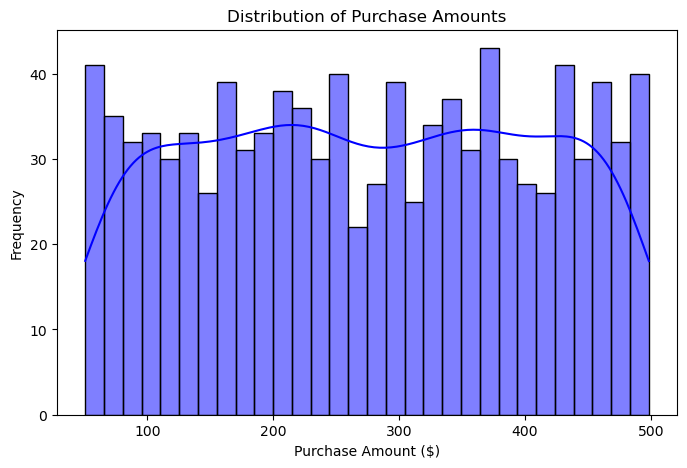

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Purchase_Amount' to numeric by removing '$' and converting to float
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Time_of_Purchase' to datetime format
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], errors='coerce')

# Handling "None" values in 'Engagement_with_Ads' by replacing with 'No Engagement'
df['Engagement_with_Ads'].replace('None', 'No Engagement', inplace=True)
print(df.head())
plt.figure(figsize=(8,5))
sns.histplot(df['Purchase_Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Frequency')
plt.show()


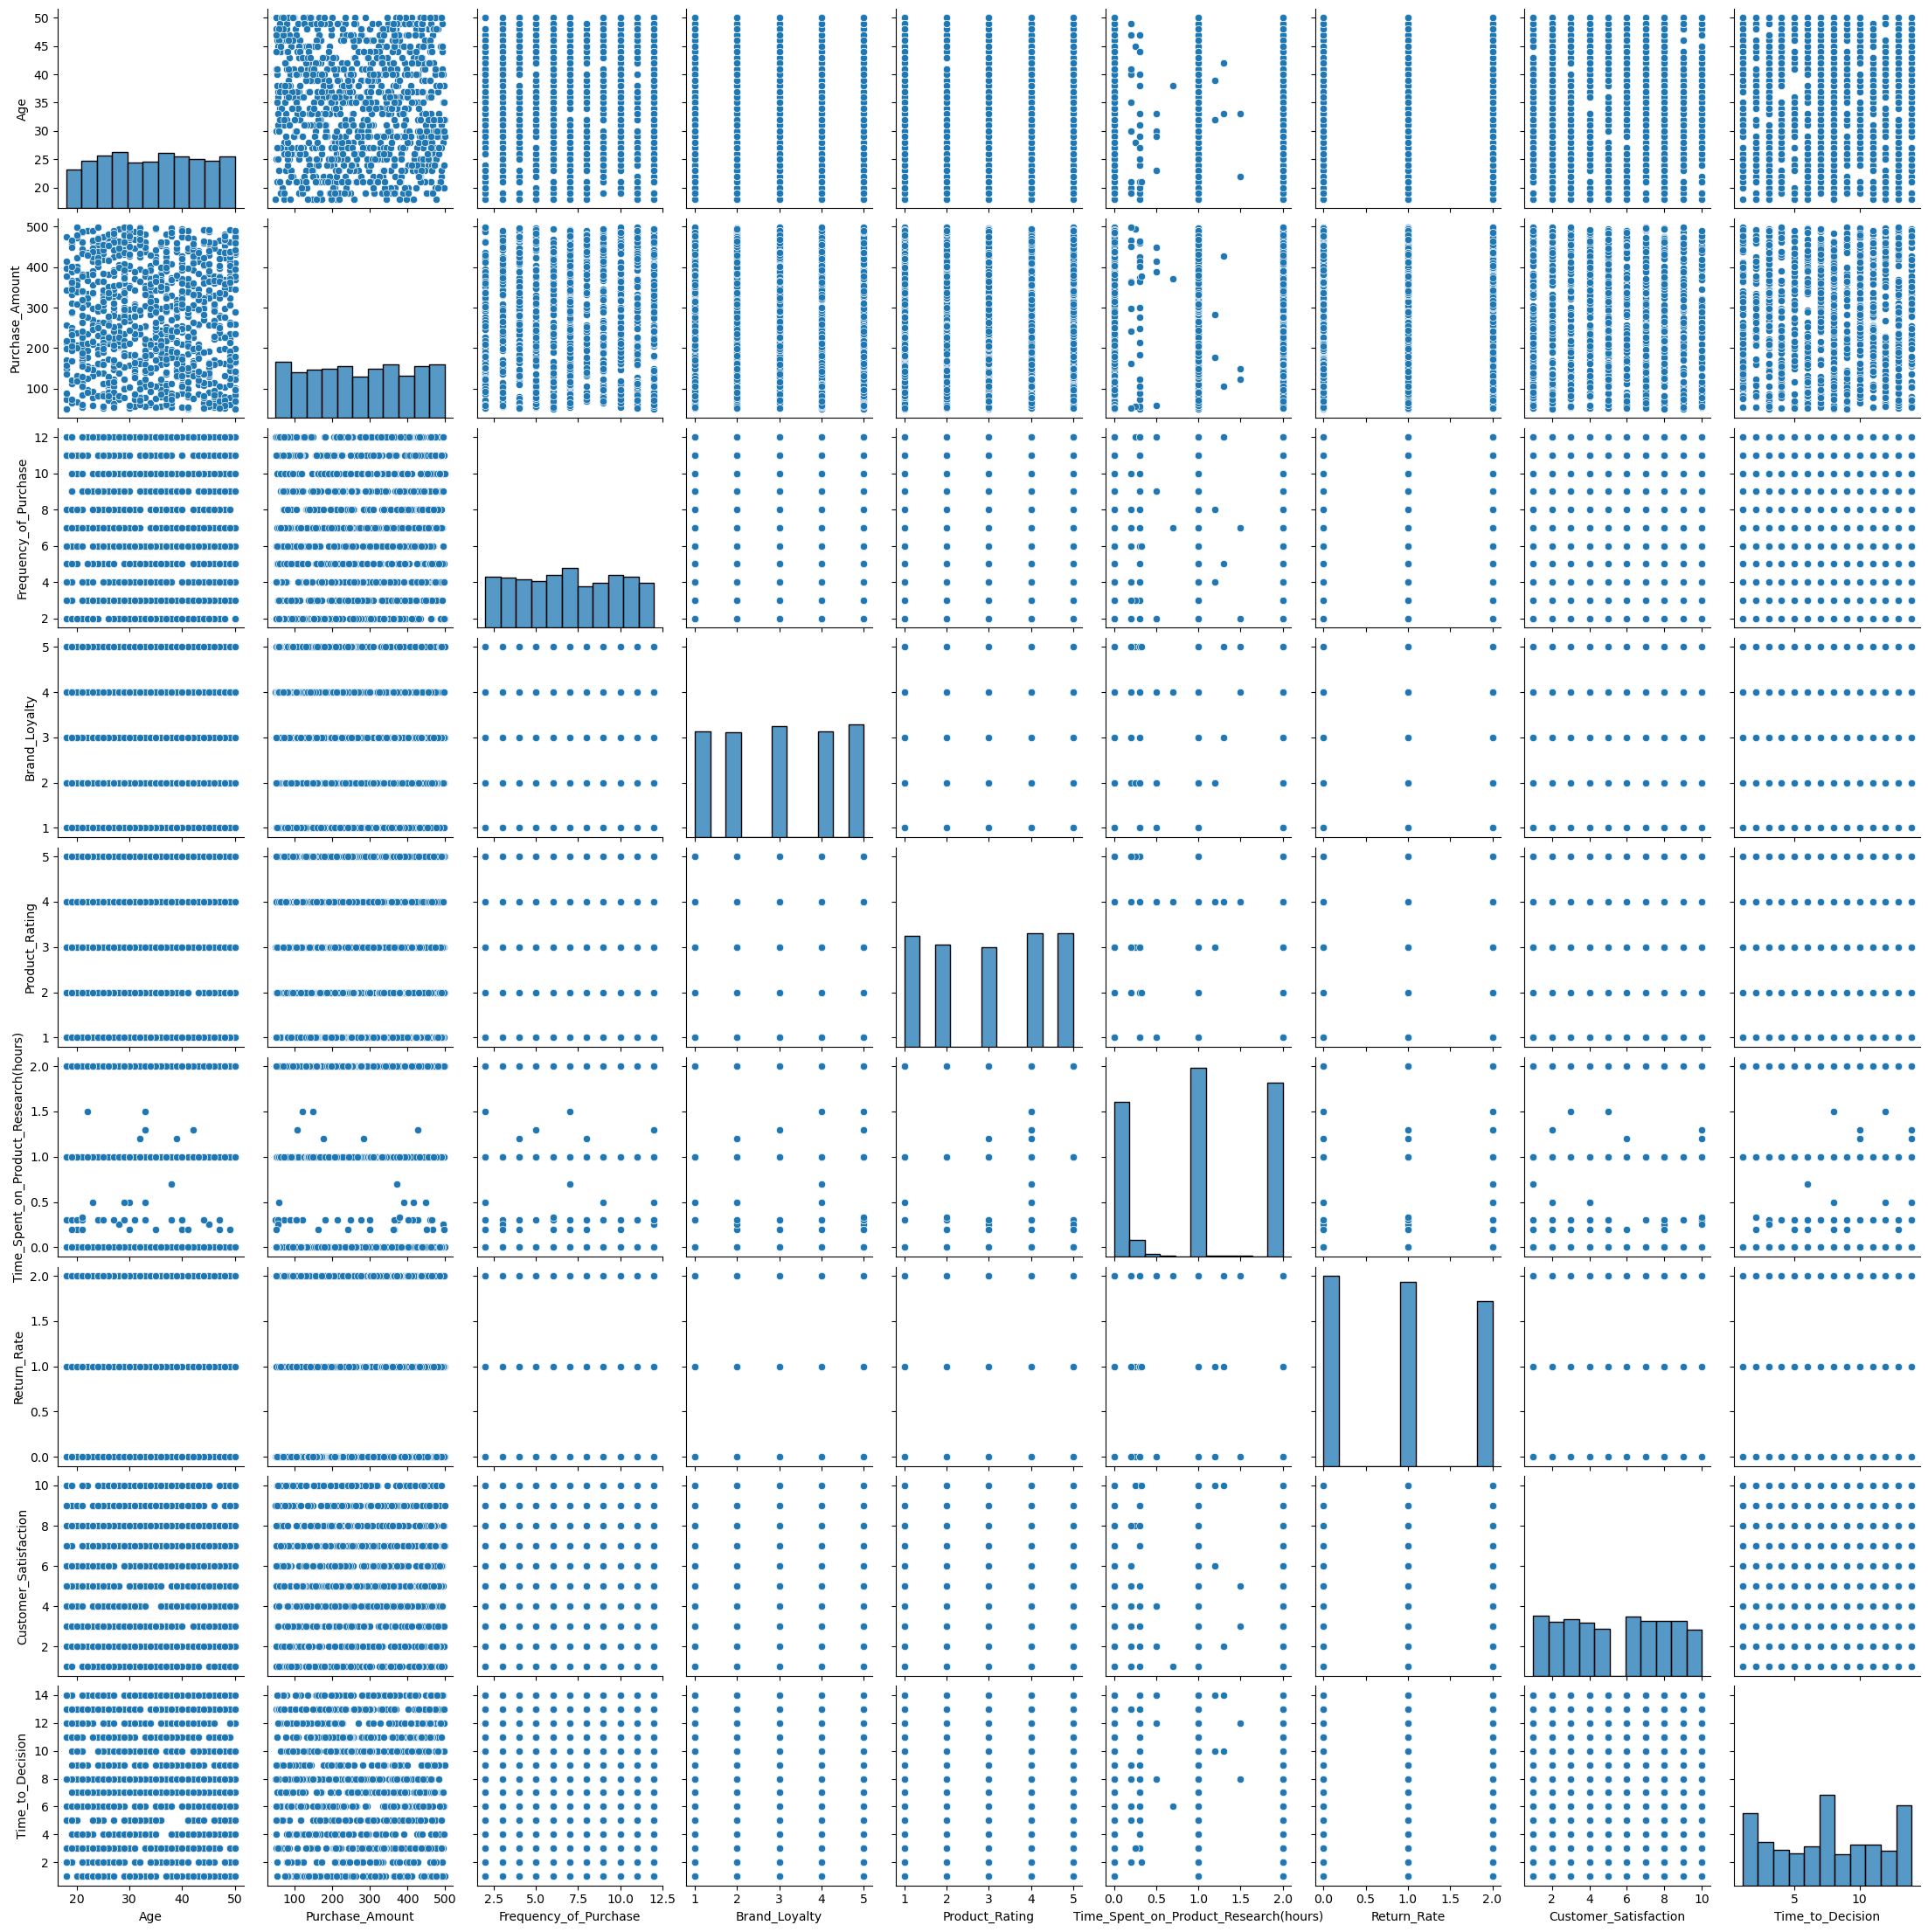

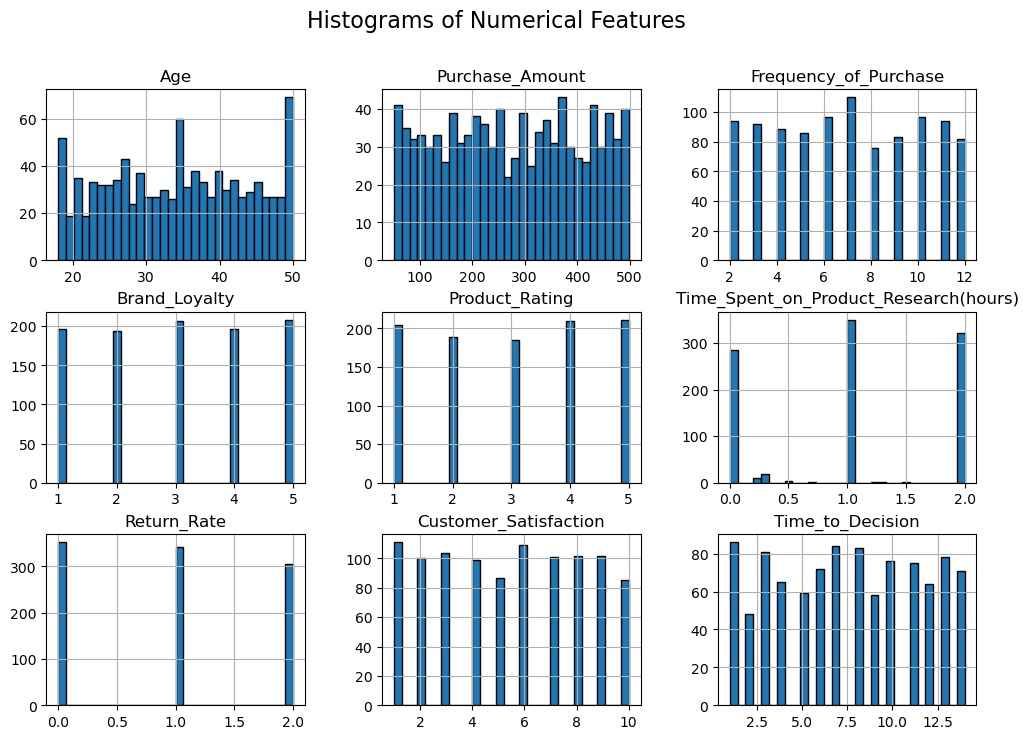

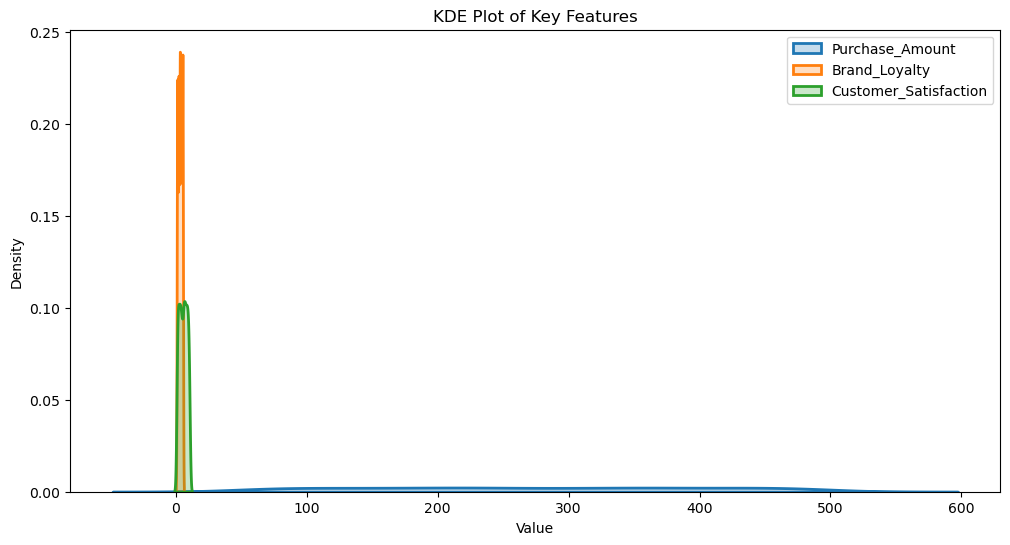

In [16]:
import numpy as np

sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
for column in ['Purchase_Amount', 'Brand_Loyalty', 'Customer_Satisfaction']:
    sns.kdeplot(df[column], label=column, fill=True, linewidth=2)

plt.title("KDE Plot of Key Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


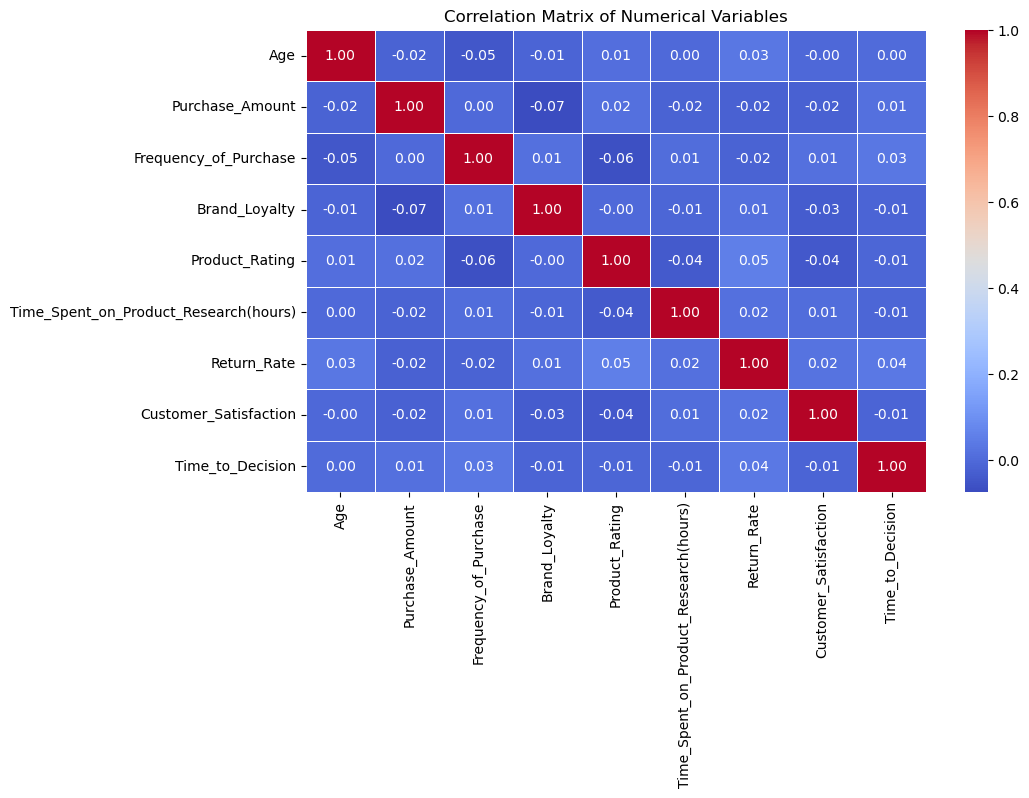

In [17]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


C:\Users\al6436\AppData\Local\Temp\ipykernel_16324\2372668080.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


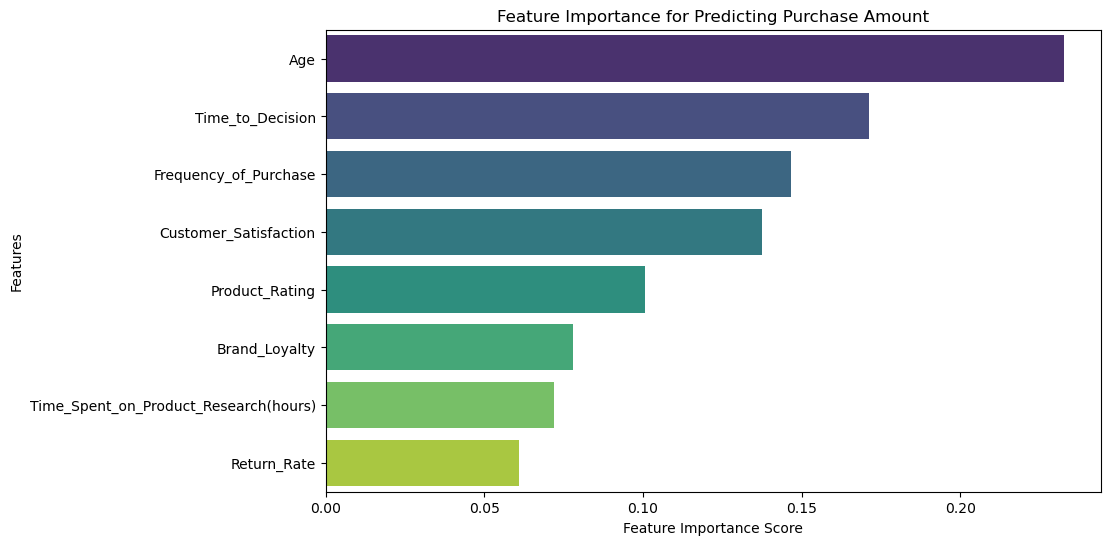

Age                                      0.232561
Time_to_Decision                         0.171335
Frequency_of_Purchase                    0.146730
Customer_Satisfaction                    0.137597
Product_Rating                           0.100682
Brand_Loyalty                            0.078046
Time_Spent_on_Product_Research(hours)    0.072012
Return_Rate                              0.061036
dtype: float64

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df[['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating', 
        'Time_Spent_on_Product_Research(hours)', 'Return_Rate', 'Customer_Satisfaction', 'Time_to_Decision']]
y = df['Purchase_Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting Purchase Amount")
plt.show()

feature_importances


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

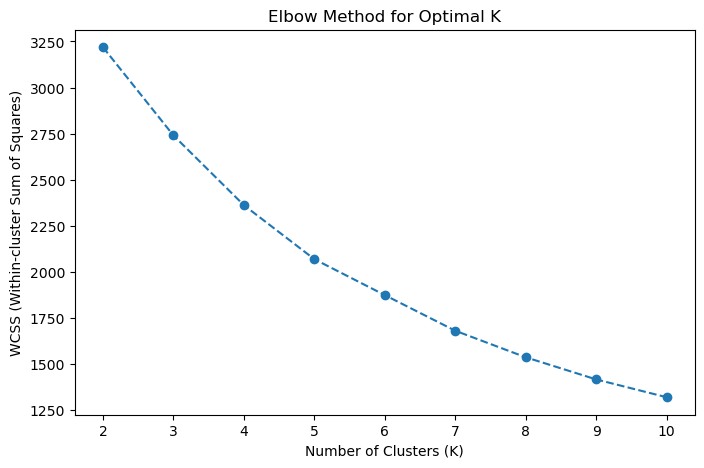

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

clustering_features = df[['Purchase_Amount', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Customer_Satisfaction']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

wcss = [] 
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [11]:
# Choose the optimal number of clusters from the Elbow Method (e.g., K=3)
optimal_k = 3  

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Check cluster distribution
print(df['Cluster'].value_counts())


Cluster
1    363
2    351
0    286
Name: count, dtype: int64


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.18


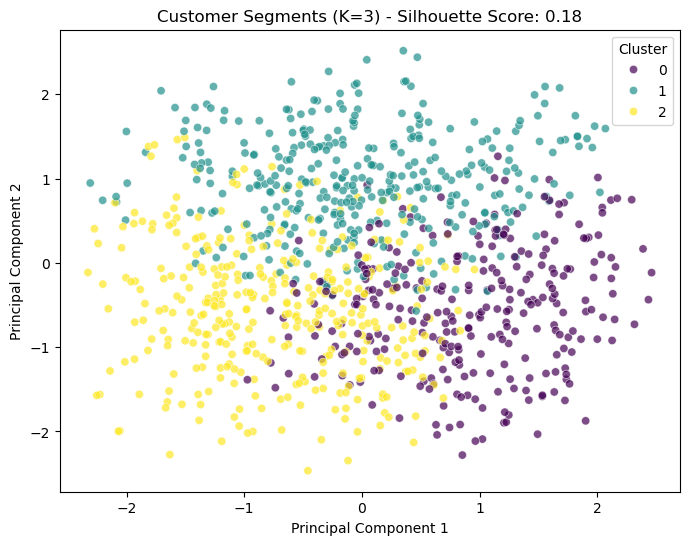

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Add PCA components to DataFrame
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df, alpha=0.7)
plt.title(f'Customer Segments (K={optimal_k}) - Silhouette Score: {silhouette_avg:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()
